In [1]:
with open('predict_prob.txt', 'r') as infile:
    all_lines = infile.readlines()

In [2]:
def str_to_bool(str):
    return True if str.lower() == 'true' else False

In [3]:
all_labels = []
all_commons = []
all_pred_probs = []
for line in all_lines:
    split_texts = line.rstrip().split(';')
    all_labels.append(int(split_texts[4]))
    all_commons.append(str_to_bool(split_texts[7]))
    all_pred_probs.append(float(  split_texts[5].replace('[', ' ').replace(']', ' ')   ))
all_pred_probs.reverse()
all_commons.reverse()
all_labels.reverse()

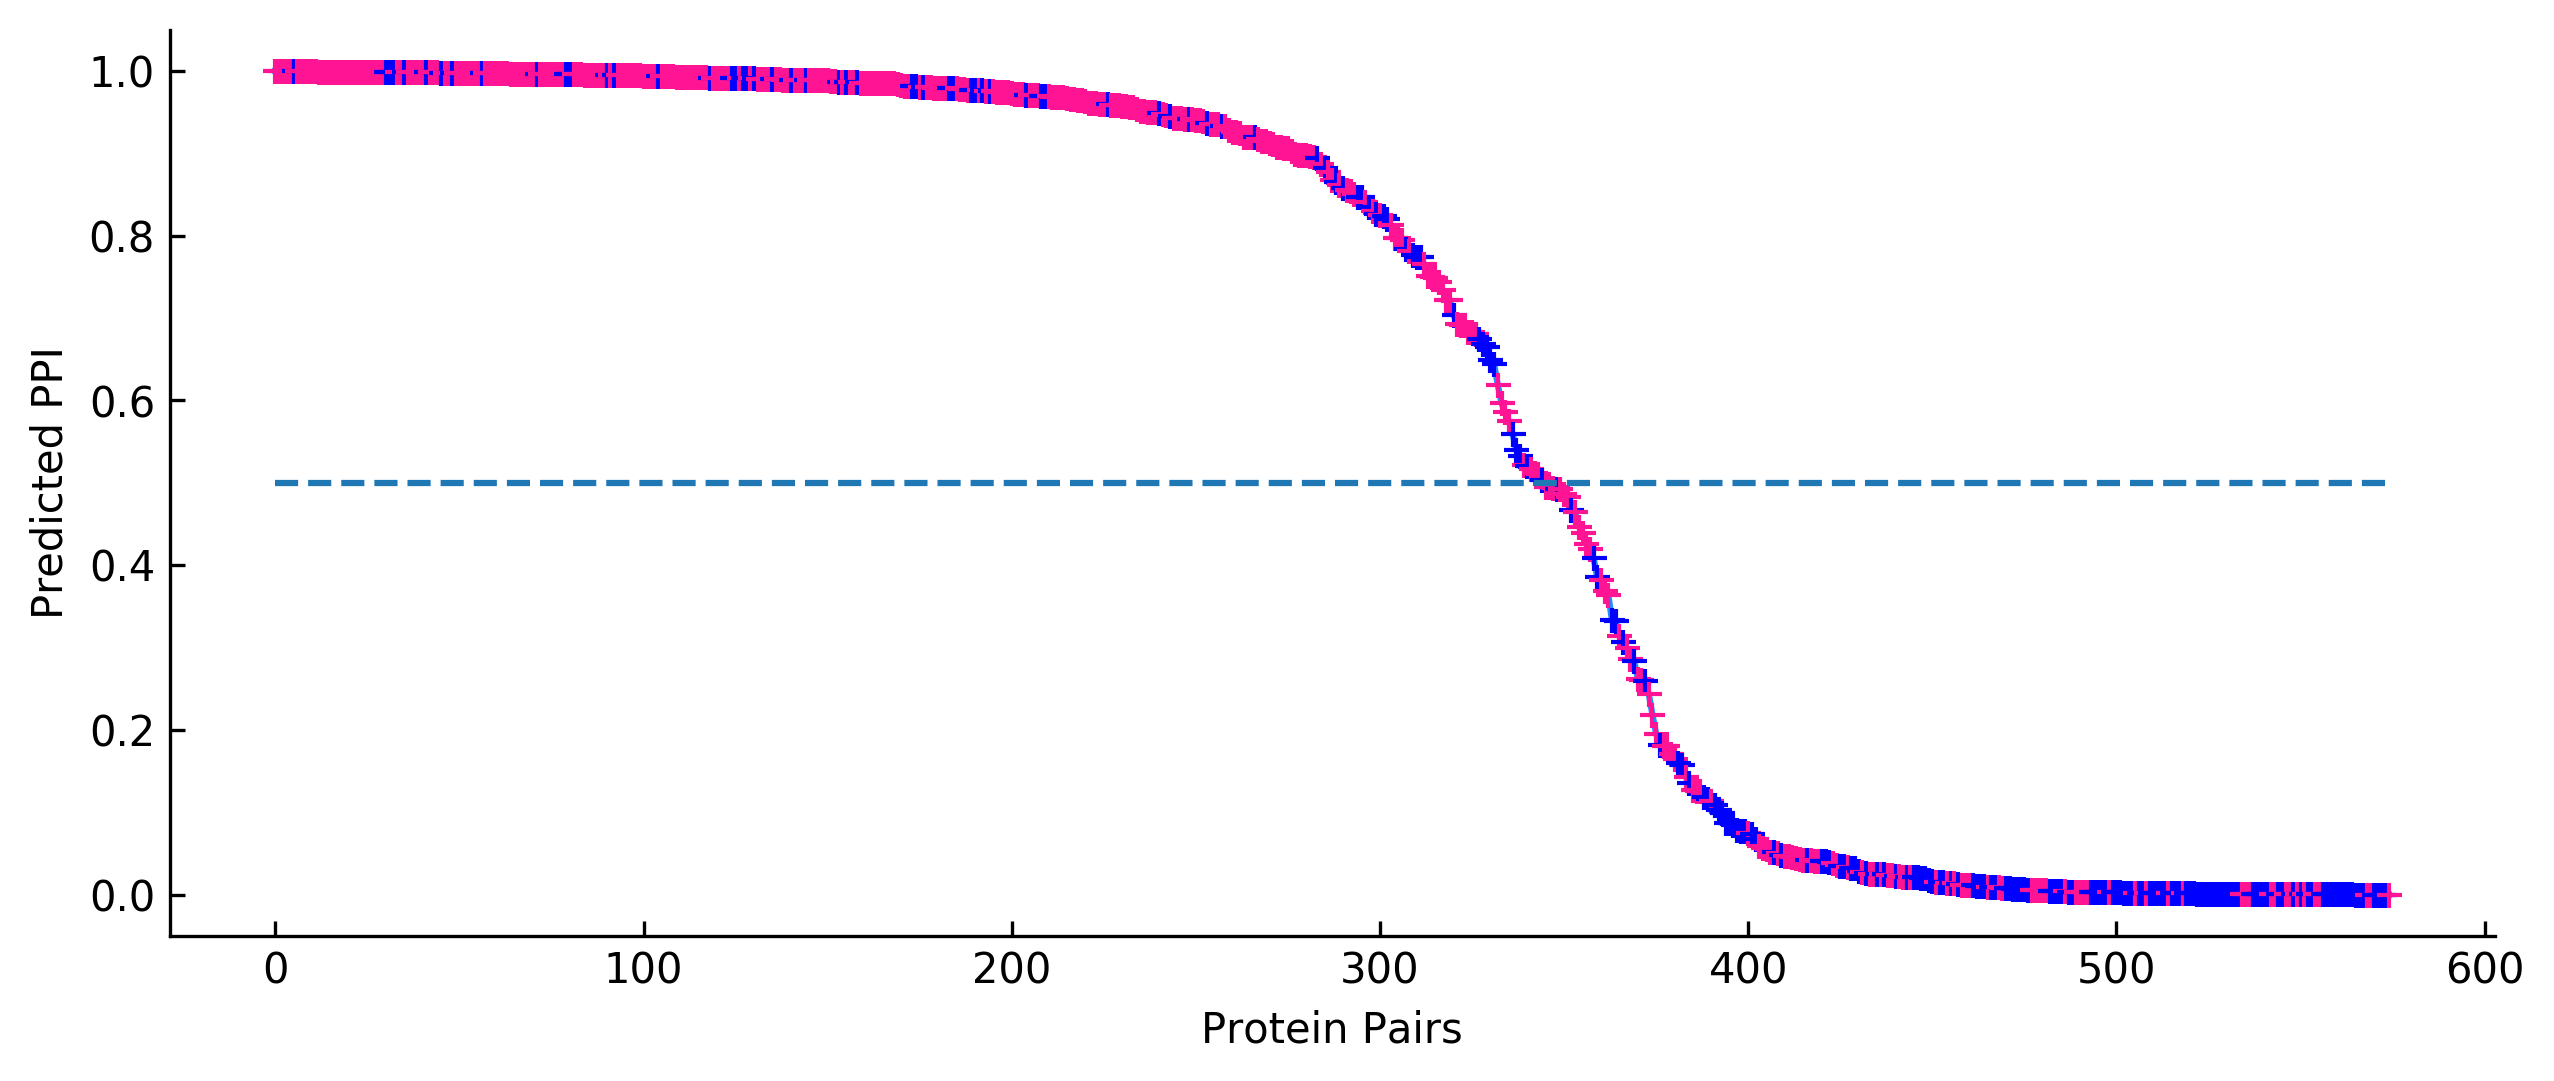

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,4), dpi=300)
ax = plt.gca()
ax.spines['top'].set_visible(False) #去掉上边框
ax.spines['right'].set_visible(False) #去掉右边框
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
plt.plot(np.arange(len(all_labels)), all_pred_probs, color='dodgerblue' )
for i in range(len(all_labels)):
    if not all_commons[i]:
        plt.plot(i, all_pred_probs[i], '+', color='b')
    else:
        plt.plot(i, all_pred_probs[i], '+',color='deeppink')  
#         plt.plot(i, all_labels[i], 'ko', c='')
#     plt.plot(i,all_pred_probs[i], 'rd' )
plt.plot(np.arange(len(all_labels)), 0.5*np.ones((len(all_labels),1)), '--')
plt.ylabel('Predicted PPI')
plt.xlabel('Protein Pairs')
plt.savefig('ppi_disease_curve.pdf')

Text(0.5, 0, 'Protein Pairs')

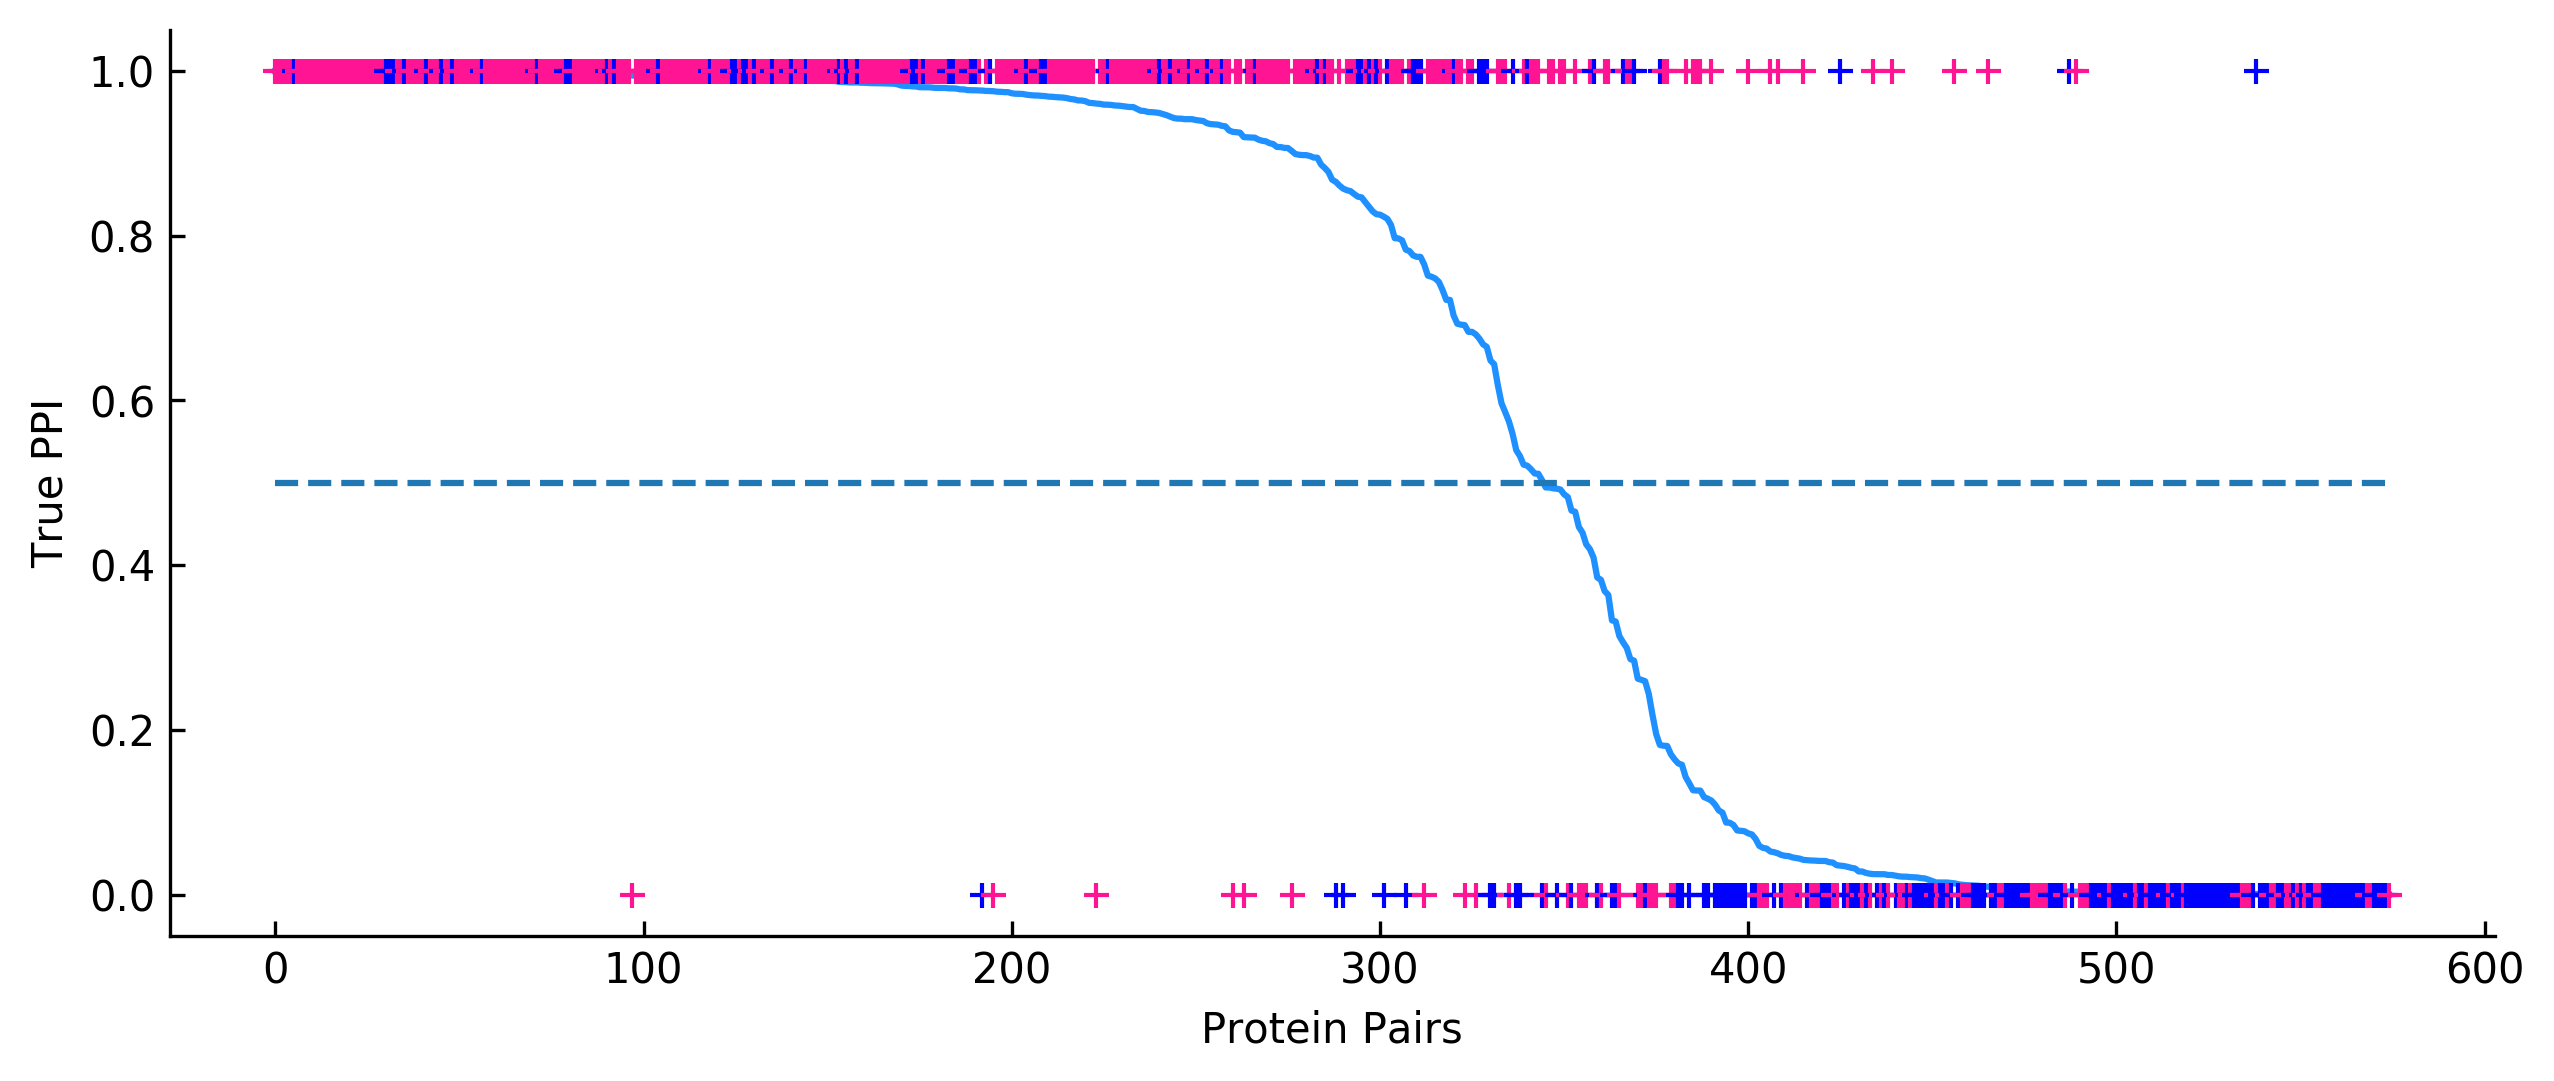

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,4), dpi=300)
ax = plt.gca()
ax.spines['top'].set_visible(False) #去掉上边框
ax.spines['right'].set_visible(False) #去掉右边框
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
plt.plot(np.arange(len(all_labels)), all_pred_probs, color='dodgerblue' )
for i in range(len(all_labels)):
    if not all_commons[i]:
        plt.plot(i, all_labels[i], '+', color='b')
    else:
        plt.plot(i, all_labels[i], '+',color='deeppink')  
#         plt.plot(i, all_labels[i], 'ko', c='')
#     plt.plot(i,all_pred_probs[i], 'rd' )
plt.plot(np.arange(len(all_labels)), 0.5*np.ones((len(all_labels),1)), '--')
plt.ylabel('True PPI')
plt.xlabel('Protein Pairs')
# plt.savefig('ppi_disease_curve.pdf')